# Notebook for testing

Load data

In [1]:
from networks import ExampleNet
from utils import train_bird_model, load_data

net = ExampleNet()
epochs, learning_rate = 3, 0.001
data = load_data()

Train network

In [2]:
net = train_bird_model(net, loaded_data=data, epochs=epochs, lr=0.001)

Epoch: 0/3: 58400img [01:10, 828.26img/s, loss=4.4873195]                          


Accuracy of the network on val images: 10 %
Test loss: 0.5555152564048768


Epoch: 1/3: 58400img [01:07, 863.37img/s, loss=3.7652855]                          
Epoch: 2/3: 58400img [01:12, 808.67img/s, loss=3.6887403]                          


Accuracy of the network on val images: 39 %
Test loss: 0.33550553750991824


Test network

Accuracy of the network on val images: 39 %
Test loss: 0.33550553750991824


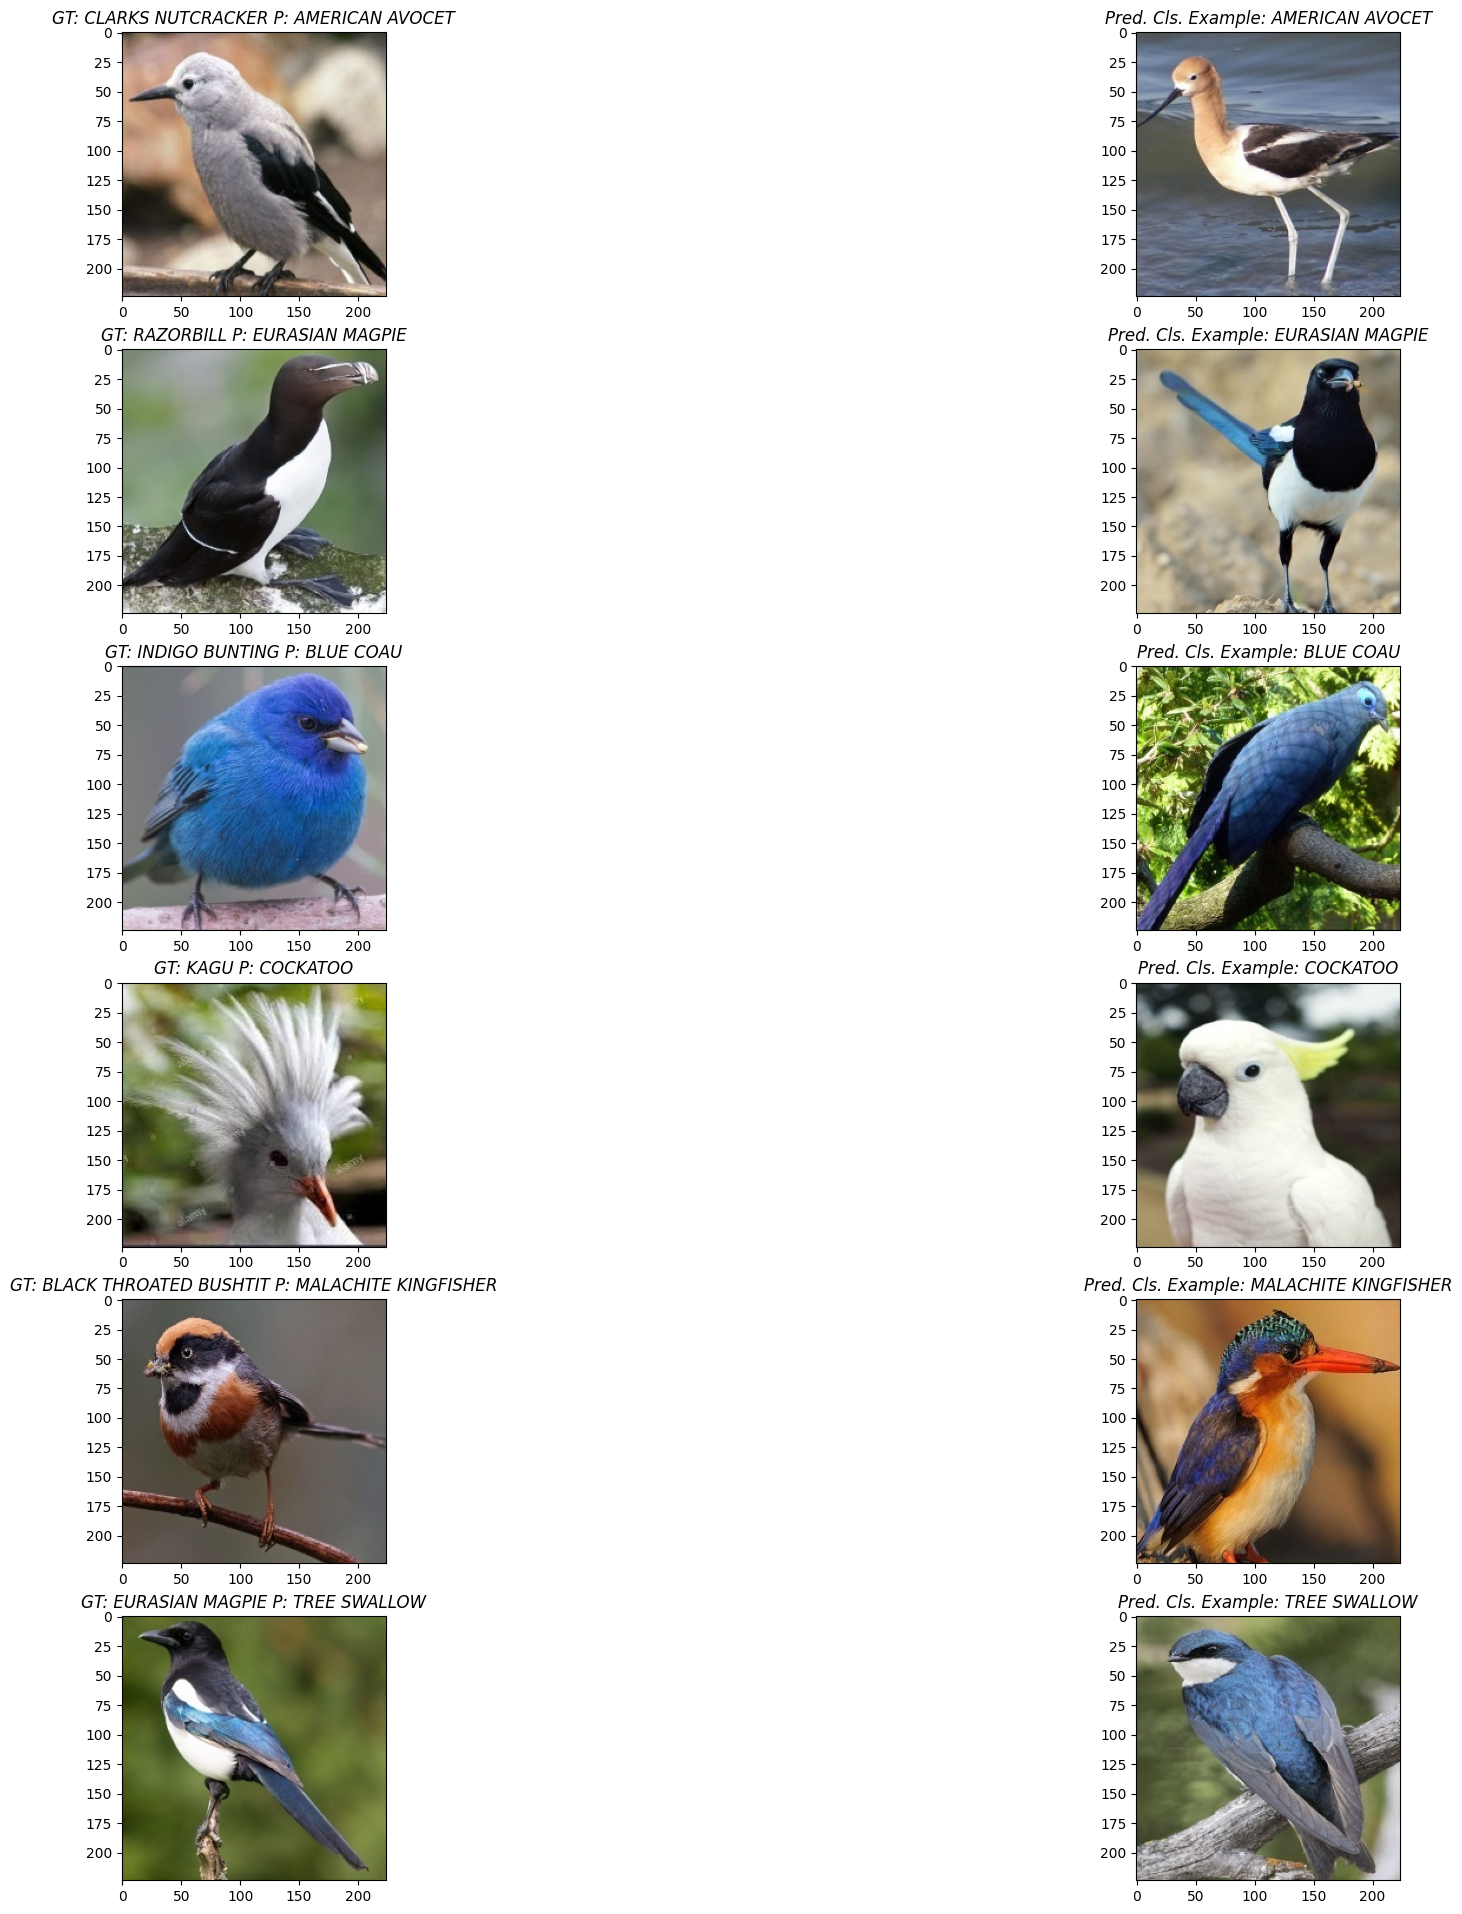

In [3]:
from utils import test_bird_model, load_data
from matplotlib import pyplot as plt

import numpy as np

trainset, trainloader, testset, testloader, valset, valloader = data

gt_array, pred_array = test_bird_model(net, testloader)

# Displaying random misclassified images
fig = plt.figure(figsize=(24, 24))
columns = 2
rows = 6
mistake_indices = np.nonzero(gt_array != pred_array)[0]
for i in range(rows):
    chosen_index = mistake_indices[np.random.randint(len(mistake_indices))]
    input, label = testset[chosen_index]
    pred_label = pred_array[chosen_index].astype(np.int32)
    pred_cls_samples = np.nonzero(gt_array == pred_label)[0]
    pred_cls_input, _ = testset[pred_cls_samples[np.random.randint(len(pred_cls_samples))]]

    img = input.detach().numpy().transpose((1, 2, 0))
    ax = fig.add_subplot(rows, columns, columns * i + 1)
    im_title = "GT: " + trainset.classes[label] + " P: " + trainset.classes[pred_label]
    ax.set_title(im_title, fontstyle='italic')
    plt.imshow(img)

    img_sample = pred_cls_input.detach().numpy().transpose((1, 2, 0))
    ax = fig.add_subplot(rows, columns, columns * i + 2)
    im_title = "Pred. Cls. Example: " + trainset.classes[pred_label]
    ax.set_title(im_title, fontstyle='italic')
    plt.imshow(img_sample)

plt.show()